# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.33859021, 0.0079147 , 0.66255967])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-X_i\theta}}$

In [11]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.593175690529389

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma{(y_ilog(p) + (1-y_i)log(1-p))}$
※ $p = \frac{1}{1 + e^{-X_i\theta}}$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y * np.log(p) + (1 - y) * (np.log(1 - p)))
    return loss

In [14]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X, parameters)
    loss = 1 / 2 * (y - y_hat) ** 2
    return loss

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss /= n
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.995407214181738

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\Sigma{(y_i-\theta^TX_i)X_{ij}}$ 
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma{(y_i - p_i)X_{ij}}$

In [17]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X, parameters)
        gradient = -(y - y_hat) * X[j]
    else:
        p = logistic(X, parameters)
        gradient = -(y - p) * X[j]
    return gradient

In [18]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.11327563534145814

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [19]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [20]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[44.24935516909498, -1.4480535879497967, 36.20363658950191]

## mini-batch
인덱스로 미니 배치 나누기

In [21]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 
1. dataset과  batch_size를 parameter로 받습니다.
2. 전체 sample수를 batch_size로 나누어 1을 더해 전체 배치 수를 구합니다.
3. for문을 사용하여 batch_size만큼 나누어진 원소가 numpy array 배열을 return합니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [22]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    parameters -= gradients
    return parameters

In [23]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.33564025, 0.00801124, 0.66014609])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 훈련집합 전체에 대해 gradient descent를 적용함. 즉, 훈련집합의 모든 sample을 훈련시킴 
- num_epoch: 전체 훈련시킬 epoch 수
<br>

BGD: epoch당 한번의 학습으로 전체 훈련집합에 대한 기울기 갱신이 이루어지지만 훈련집합이 매우 클 경우 메모리문제가 발생할 수 있음. 전체 데이터에 대해 loss를 계산하기 때문에 안정적으로 최적 parameter를 계산할 수 있지만, parameter 갱신 수가 극도로 낮으므로 매우 느림. convex문제가 아닐 경우 지역최적화문제가 있음. 

SGD: 하나의 sample에 대해 기울기 갱신이 이루어지므로 epoch당 sample의 수만큼 학습함. 1개의 sample을 통해 기울기 갱신이 이루어지므로 loss가 튀는 현상때문에 parameter의 안정적인 수렴이 어려움. 쉬운 문제의 경우 가장 빠르게 최적점에 도달할 수 있음.

MGD: 한번에 k(0 < k < n_samples)개의 sample에 대해 학습함. sgd에 비해 안정적인 수렴 + 병렬처리 가능. bgd에 비해 빠른 계산 + 지역최적화문제 해결
<br>
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> Stochastic Gradient Descent  
batch_size=k -> mini-batch Gradient Descent  
batch_size=whole -> Batch Gradient Descent

In [24]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

* 위의 gradient_descent의 경우 sgd방식으로 학습할 때 parameter가 어느정도 수렴한 후 loss가 진동하는 상황이 발생하여 bgd와 mgd에서의 tolerance와 비슷한 크기로 tolerance를 설정할 경우 학습이 중단되지 않는 문제점이 있습니다. 따라서 한 epoch 전체의 loss를 계산하여 그를 통해 중단조건을 걸어주는 방식으로 코드를 바꿔보았습니다

In [25]:
def gradient_descent_improved(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16, verbose = 0):
    stopper = False
    
    N = len(X_train.iloc[0])
    #hyperparameter별 성능비교를 위해 seed고정
    np.random.seed(317)
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    epoch_loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        new_epoch_loss = 0
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
    
        #epoch loss
        new_epoch_loss = batch_loss(X_train, y_train, parameters, loss_function, len(X_train))
            
        #중단 조건(epoch loss)
        if abs(new_epoch_loss - epoch_loss) < tolerance:
            break
        epoch_loss = new_epoch_loss
        
        #100epoch마다 학습 상태 출력
        if verbose == 1:
            if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
                print(f"epoch: {epoch}  loss: {new_epoch_loss}  params: {parameters}  gradients: {gradients}")
    return parameters, new_epoch_loss

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [26]:
new_param_bgd, new_epoch_loss = gradient_descent_improved(X_train, y_train,
                                                          learning_rate = 0.1, num_epoch = 10000, tolerance = 0.00001,
                                                          model = 'logistic', batch_size = len(X_train), verbose = 1)
new_param_bgd

epoch: 0  loss: 1.0077190022198743  params: [0.2779874  0.71223631 0.92794493]  gradients: [0.026362909353523378, 0.014065860394253499, 0.03557708706925854]
epoch: 100  loss: 0.4626951004337041  params: [-0.83547319  0.80861434 -0.70420743]  gradients: [0.0033643503178876016, -0.006180781536037225, 0.00726330606361644]
epoch: 200  loss: 0.39653844744655686  params: [-1.0296477   1.35242059 -1.26854483]  gradients: [0.0012456522961709847, -0.004636173188229878, 0.004570421333485486]
epoch: 300  loss: 0.36406830573133  params: [-1.13246683  1.75196747 -1.65912054]  gradients: [0.0008853171221793472, -0.0034608972340544235, 0.0033632407258878936]
epoch: 400  loss: 0.34522362698202086  params: [-1.21240276  2.05790318 -1.95536704]  gradients: [0.0007272706116459082, -0.0027174078547427976, 0.0026223588522449708]
epoch: 500  loss: 0.33320421828199137  params: [-1.27925817  2.3026999  -2.19094678]  gradients: [0.000615898366142618, -0.002213277823345135, 0.002124140839121367]
epoch: 600  los

array([-1.59180641,  3.36860488, -3.20168357])

In [27]:
new_param_mgd, new_epoch_loss = gradient_descent_improved(X_train, y_train,
                                                          learning_rate = 0.1, num_epoch = 10000, tolerance = 0.00001,
                                                          model = 'logistic', batch_size = 16, verbose = 1)
new_param_mgd

epoch: 0  loss: 0.8250676854818366  params: [0.0357701  0.57414146 0.60226932]  gradients: [0.05754015449915521, 0.0539984474991064, 0.06938131607056673]
epoch: 100  loss: 0.3087741939945116  params: [-1.55810858  3.06016902 -3.00822915]  gradients: [0.0074180006912135665, 0.010920907231229605, 0.014547327246469071]
epoch: 200  loss: 0.30020578276493287  params: [-1.77246717  3.74270526 -3.65265103]  gradients: [0.0069735049739884005, 0.01056371950441252, 0.01307584433668057]


array([-1.83314726,  3.93282171, -3.83074835])

In [28]:
new_param_sgd, new_epoch_loss = gradient_descent_improved(X_train, y_train,
                                                          learning_rate = 0.1, num_epoch = 10000, tolerance = 0.00001,
                                                          model = 'logistic', batch_size = 1, verbose = 1)
new_param_sgd

epoch: 0  loss: 0.4291630656003589  params: [-0.86554985  0.99220349 -1.11970185]  gradients: [0.0255864859722985, 0.013924190138782159, 0.01800241464503814]


array([-1.90439921,  4.09950491, -3.99885397])

같은 learning_rate, tolerance를 적용했을 때, epoch당 갱신수에 따라 bgd, mgd, sgd순으로 최적화가 늦게 이루어짐. 동일하게 epoch_loss를 기준으로 tolerance를 적용하였는데  최적화 방법에 따라 parameter가 꽤 상이하게 추정됨. test data에 대해 평가해보면 성능의 차이가 있을것이라 판단됨.

#### 가장 많이 쓰이는 최적화방법이고 sgd와 bgd의 장단점을 적절히 섞은 mini-batch gradient descent로 batch_size는 16으로 고정하여 learning_rate와 tolerance를 변화시켜가며 grid-search 수행( loss를 통해 비교)

In [29]:
def GridSearchV(X_train, y_train, X_test, y_test, hyper_params):
    df = pd.DataFrame()
    df.columns
    lrs = []
    tols = []
    train_losses = []
    test_losses = []
    for lr in hyper_params['learning_rate']:
        for tol in hyper_params['tolerance']:
            new_param_mgd, train_loss = gradient_descent_improved(X_train, y_train,
                                                     learning_rate = lr, num_epoch = 10000, tolerance = tol,
                                                     model = 'logistic', batch_size = 16, verbose = 0)
            
            #predict(X_test)
            y_pred = []
            for i in range(len(X_test)):
                p = logistic(X_test.iloc[i, :], new_param_mgd)
                y_pred.append(p)
            y_pred = pd.Series(y_pred)
            test_loss = batch_loss(X_test, y_test, new_param_mgd, minus_log_cross_entropy_i, len(X_test))
            
            lrs.append(lr)
            tols.append(tol)
            train_losses.append(train_loss)
            test_losses.append(test_loss)

    df['learning_rate'] = lrs
    df['tolerance'] = tols
    df['train_loss'] = train_losses
    df['test_loss'] = test_losses
    return df

In [30]:
hyper_params = {'learning_rate' : [1 * 0.5**i for i in range(5)],
                'tolerance' : [0.0001 * 0.5**i for i in range(5)]}

In [31]:
log = GridSearchV(X_train, y_train, X_test, y_test, hyper_params)

In [32]:
log.sort_values("test_loss").head(25)

,learning_rate,tolerance,train_loss,test_loss
4,1.0000,0.000006,0.301599,0.252665
3,1.0000,0.000013,0.301622,0.253135
2,1.0000,0.000025,0.301668,0.253724
1,1.0000,0.000050,0.301790,0.254756
9,0.5000,0.000006,0.299742,0.255016
8,0.5000,0.000013,0.299793,0.255657
0,1.0000,0.000100,0.302039,0.256195
7,0.5000,0.000025,0.299890,0.256474
14,0.2500,0.000006,0.299175,0.256820
13,0.2500,0.000013,0.299285,0.257712


In [33]:
log.groupby("learning_rate")['test_loss'].mean().sort_values()

learning_rate
1.0000    0.254095
0.5000    0.257037
0.2500    0.259761
0.1250    0.262754
0.0625    0.266538
Name: test_loss, dtype: float64

In [34]:
log.groupby("tolerance")['test_loss'].mean().sort_values()

tolerance
0.000006    0.256603
0.000013    0.257677
0.000025    0.259237
0.000050    0.261605
0.000100    0.265063
Name: test_loss, dtype: float64

결과적으로 주어진 하이퍼파라미터들 중 learnsing_rate가 가장 클 때(1)와 tolerance가 가장 작을때의 성능이 가장 좋았고, 반대로 learning_rate가 가장 작을때(0.0625)와 tolenrance가 가장 클때의 성능이 가장 좋지 않았음

전반적으로도 learning_rate가 클때의 test_loss가 낮고, train_loss는 높은 경향을 보였는데 이는 너무 작은 learning rate는 오히려 트레인셋에 과적합이 되어 나타나는 현상으로 판단된다. 또한, train_loss와 test_loss모두에서 tolerance가 작을때 더 좋은 성능을 보였는데 tolerance가 너무 클 경우 데이터를 충분히 학습하지 못한 결과라고 판단된다.

### Predict Label

이후 test_loss가 가장 낮았던 hyper parameter(lr = 1, tol = 6.25e-06)로 최적화를 진행한 후 threshold 0.5를 기준으로 예측을 수행한다.

In [35]:
new_param_mgd, train_loss = gradient_descent_improved(X_train, y_train,
                                                     learning_rate = 1., num_epoch = 10000, tolerance = 6.25e-06,
                                                     model = 'logistic', batch_size = 16, verbose = 1)
new_param_mgd, train_loss

epoch: 0  loss: 0.4780757669162645  params: [-0.91391092  0.56678884 -0.94219864]  gradients: [0.17060485097826406, 0.17683594908912809, 0.2819733338847531]


(array([-1.99410758,  4.11815288, -4.15031133]), 0.3015989579235988)

In [36]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [37]:
from sklearn.metrics import *

In [38]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[37,  3],
       [ 2,  8]], dtype=int64)

In [39]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:", accuracy)
print("sensitivity :", tp / (tp + fn))
print("specificity :", tn / (fp + tn))

accuracy: 0.9
sensitivity : 0.8
specificity : 0.925


도출된 parameter를 통해 예측하고 정확도, 민감도, 특이도를 통해 성능을 측정한다.
정확도와 특이도는 양호한 편이나 실제 1중 1로 예측한 비율인 민감도가 현저히 떨어지는것을 확인할 수 있다.

## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [40]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [41]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

정규방정식을 이용하면 $\hat{\beta} = (X^TX)^{-1}X^Ty$식으로 회귀계수를 추정할 수 있다.

In [42]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.17435363, 3.20029089])

In [43]:
#경사하강법
new_param, loss = gradient_descent_improved(X, y, learning_rate = 0.1, num_epoch = 10000, tolerance = 0.000001,
                                      model = 'linear', batch_size = 32, verbose = 1)
new_param

epoch: 0  loss: 0.7121655155892971  params: [0.73391864 1.03499601]  gradients: [-0.07087725218079671, -0.051732252366537154]
epoch: 100  loss: 0.3882913835731118  params: [0.22658268 3.12437596]  gradients: [-0.00903829194531716, -0.005978745189347095]


array([0.19136 , 3.190181])

정규방정식을 통해 추정한 회귀계수와 경사하강법을 통해 추정한 회귀계수를 통해 예측을 수행한다

In [44]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

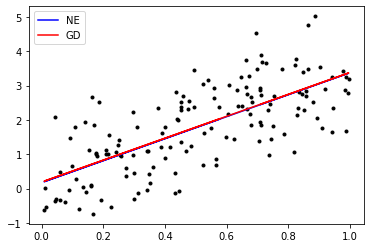

In [45]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

파란선은 정규방정식을 통해 추정한 회귀선이고 빨간선은 경사하강법을 통해 추정한 회귀선이다. 회귀계수 측면에서 미세한 값의 차이가 있지만 시각화해보았을때 큰 차이가 없는것을 알 수 있다.